# Theorical Questions

**Question 1. What is Simple Linear Regression?**

**Answer:**

Simple Linear Regression models the relationship between a dependent variable (Y) and one independent variable (X) by fitting a linear equation of the form:

Y = c + mX + e

The model finds the "best-fit" line that minimizes the distance between the data points and the line itself, typically using the least squares method.

Where:
- Y is the dependent variable (the one you are trying to predict).
- X is the independent variable (the one you are using to predict Y).
- c is the y-intercept (the value of Y when X is 0).
- m is the slope (the change in Y for a one-unit change in X).
- e is the error term (the part of Y that the linear relationship doesn't explain).

Examples:

- Predicting student's score (Y) based on number of hours they studied.
- Predicting house price (Y) based on house size (X). The price changes linearly as size changes.


**Question 2. What are the key assumptions of Simple Linear Regression?**

**Answer:**

The key assumptions of simple linear regression are that the relationship between the two variables is linear, the errors have constant variance (homoscedasticity), the errors are independent, and the errors are normally distributed. These assumptions ensure that the model's estimates are reliable and the model can accurately represent the data.

 - Linearity: Linear relationship between predictor and response.

 - Independence: Observations are independent.

 - Homoscedasticity: Constant variance of errors.

 - Normality: Errors are normally distributed.

 - No multicollinearity (in multiple regression).

Example:

- House price data collected from independent houses with constant variance of errors.


**Question 3. What is heteroscedasticity, and why is it important to address in regression models?**

**Answer:**

Heteroscedasticity means unequal variance of errors across values of the independent variable, violating homoscedasticity assumption, which can bias statistical tests.

Heteroscedasticity is when the variance of the residuals (the error term) in a regression model is not constant across all levels of the independent variables. It is important to address because it violates a key assumption of ordinary least squares (OLS) regression, which leads to unreliable standard errors and can make the coefficient estimates inefficient and less precise. This reduces the model's validity, affecting confidence intervals and hypothesis testing

Examples:

- Income variance increasing with age in income vs. age regression.
- In a model predicting household spending based on income, the variability in spending is much higher for high-income households than for low-income households.


**Question 4. What is Multiple Linear Regression??**

**Answer:**

Multiple linear regression is a statistical technique that models the relationship between a single dependent variable and two or more independent variables. It's an extension of simple linear regression that uses a linear equation to estimate how changes in multiple predictor variables affect an outcome variable, allowing for more precise predictions than using a single predictor.

Key metrics are P-value, f-test, r-square and adjusted r-square.

Examples:

- Predicting house price based on size, rooms, and age.
- Determining how a student's test score is affected by hours studied, previous grades, and class attendance.


**Question 5. What is polynomial regression, and how does it differ from linear regression?**

**Answer:**

Polynomial regression models the relationship between a dependent variable and independent variables as an nth-degree polynomial, allowing it to capture non-linear or curved data patterns. In contrast, linear regression assumes a straight-line, linear relationship between variables, making it suitable for linear data but less effective for curves.

Models relationship as an nth degree polynomial allowing curvature, unlike linear regression which fits a straight line.

Example:

- Predicting an employee's salary based on their years of experience. A linear model assumes salary increases by a constant amount for each additional year of experience.

However, the relationship is often a curve: salary increases rapidly early in a career but the rate of increase might slow down later.

# Practical Questions

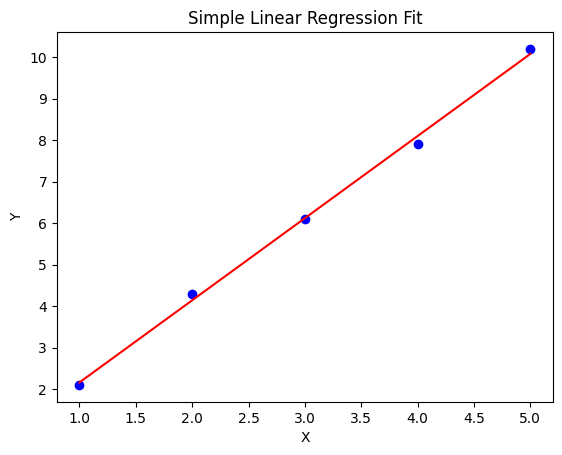

In [9]:
# 6

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)
Y = np.array([2.1, 4.3, 6.1, 7.9, 10.2])

model = LinearRegression()
model.fit(X, Y)

Y_pred = model.predict(X)

plt.scatter(X, Y, color='blue')
plt.plot(X, Y_pred, color='red')
plt.title('Simple Linear Regression Fit')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()


In [10]:
# 7

area = [1200, 1500, 1800, 2000]
rooms = [2, 3, 3, 4]
price = [250000, 300000, 320000, 370000]

data7 = pd.DataFrame({'Area': area, 'Rooms': rooms, 'Price': price})
X7 = data7[['Area', 'Rooms']]
Y7 = data7['Price']

model7 = LinearRegression()
model7.fit(X7, Y7)

# Calculate VIF for multicollinearity

X7_with_const = sm.add_constant(X7)
vif_data = pd.DataFrame()
vif_data['feature'] = X7.columns
vif_data['VIF'] = [variance_inflation_factor(X7_with_const.values, i + 1) for i in range(X7.shape[1])]

print("Coefficients:", model7.coef_)
print("Intercept:", model7.intercept_)
print("VIF Data:\n", vif_data)

Coefficients: [   63.15789474 34736.84210526]
Intercept: 103157.89473684214
VIF Data:
   feature       VIF
0    Area  7.736842
1   Rooms  7.736842


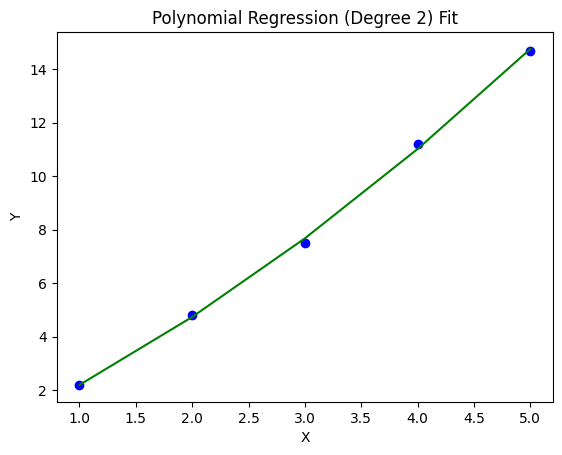

Polynomial Coefficients: [0.   1.94 0.2 ]
Polynomial Intercept: 0.06000000000000938


In [11]:
# 8

X8 = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)
Y8 = np.array([2.2, 4.8, 7.5, 11.2, 14.7])

poly = PolynomialFeatures(degree=2)
X8_poly = poly.fit_transform(X8)

model8 = LinearRegression()
model8.fit(X8_poly, Y8)

Y8_pred = model8.predict(X8_poly)

plt.scatter(X8, Y8, color='blue')
plt.plot(X8, Y8_pred, color='green')
plt.title('Polynomial Regression (Degree 2) Fit')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

print("Polynomial Coefficients:", model8.coef_)
print("Polynomial Intercept:", model8.intercept_)

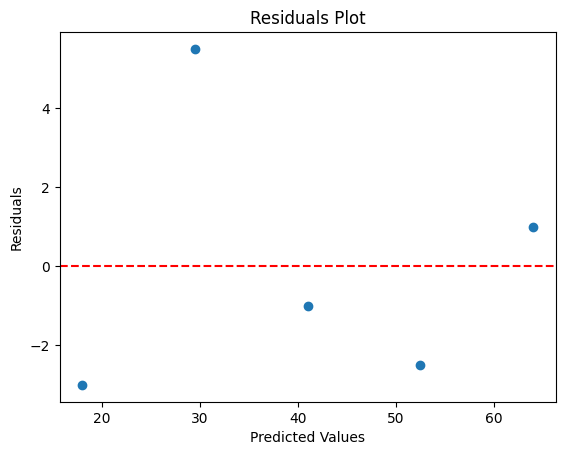

In [12]:
# 9


X9 = np.array([10, 20, 30, 40, 50]).reshape(-1, 1)
Y9 = np.array([15, 35, 40, 50, 65])

model9 = LinearRegression()
model9.fit(X9, Y9)
Y9_pred = model9.predict(X9)

residuals = Y9 - Y9_pred

plt.scatter(Y9_pred, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residuals Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

**Question 10:**

Imagine you are a data scientist working for a real estate company. You
need to predict house prices using features like area, number of rooms, and location.
However, you detect heteroscedasticity and multicollinearity in your regression
model. Explain the steps you would take to address these issues and ensure a robust
model.

**Answer:**

As a data scientist encountering heteroscedasticity and multicollinearity in a house price prediction regression model with features area, number of rooms, and location, we should perform the following steps:

- Addressing Heteroscedasticity :

1. **Diagnose Thoroughly:** Visualize residuals vs. predicted values plot to confirm the presence of heteroscedasticity (non-constant variance of errors).

2. **Transform Dependent Variable:** Apply transformations such as log, square root, or Box-Cox transformation on house prices to stabilize variance.

3. **Weighted Least Squares (WLS):** Use WLS regression which assigns weights inversely proportional to error variance to account for heteroscedasticity.

4. **Robust Standard Errors:** Use heteroscedasticity-consistent standard error estimators to get valid inference even with heteroscedasticity.

5. **Consider Non-linear Models:** If simple transformations don't help, try non-linear regression or machine learning models which can capture complex variance structures.

- Addressing Multicollinearity :

1. **Calculate VIF (Variance Inflation Factor):** Identify highly correlated predictors with high VIF values to quantify collinearity severity.

2. **Remove or Combine Features:** Temporarily remove or combine correlated variables, for example, create an index or principal components.

3. **Regularization:** Use regularized regression methods like Ridge Regression or Lasso that penalize large coefficients and reduce multicollinearity impact.

4. **Feature Engineering:** Use domain knowledge to create meaningful new features, possibly reducing redundancy.

5. **Increase Sample Size:** More data helps better estimation to mitigate multicollinearity effects.

To ensure a Robust Model, we :

- Perform cross-validation to evaluate model stability.
- Validate the model on a hold-out or external test set.
- Continuously monitor residual diagnostics to ensure assumptions hold.
- Document preprocessing and modeling decisions for reproducibility.

By applying these steps, we ensure a reliable prediction of house prices despite the issues of heteroscedasticity and multicollinearity in the regression model.